# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file `regression.csv` to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')

In [3]:
df = df.drop(columns=['pageviews'])
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


In [4]:
X = df[['num_commits', 'AVG(diff)']]
best_scores = []

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
def clusterize_kmeans(X, n_clusters=3):
    km = KMeans(n_clusters=n_clusters, random_state=21)
    pred = km.fit_predict(X)
    score = silhouette_score(X, pred)
    return pred, score

def visulize_clusters(pred, X):
    plt.figure(figsize=(10, 6))
    plt.scatter(X['num_commits'], X['AVG(diff)'], c=pred, cmap='viridis')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Diff')
    plt.title('User Clusters by Commit Activity')
    plt.colorbar(label='Cluster')
    plt.show()

scores = {}

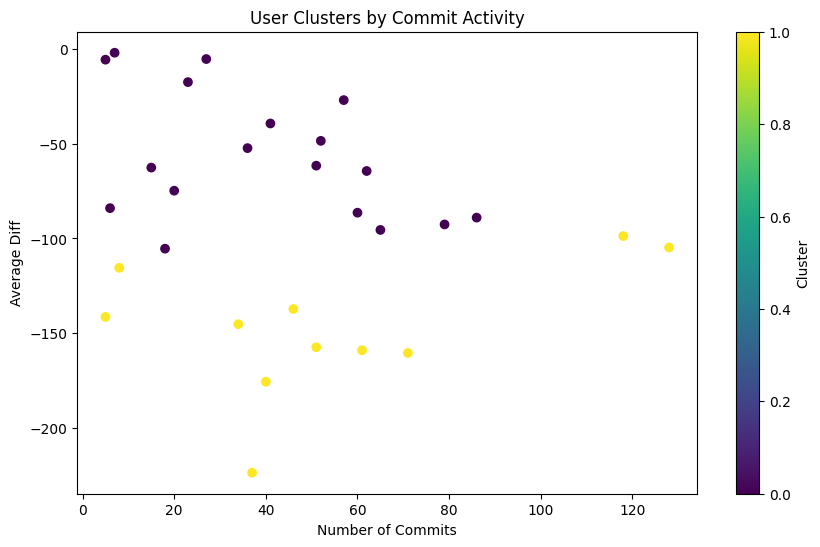

In [6]:
pred, score = clusterize_kmeans(X, n_clusters=2)
visulize_clusters(pred, X)
scores['2'] = score
best_score = {'2': score}

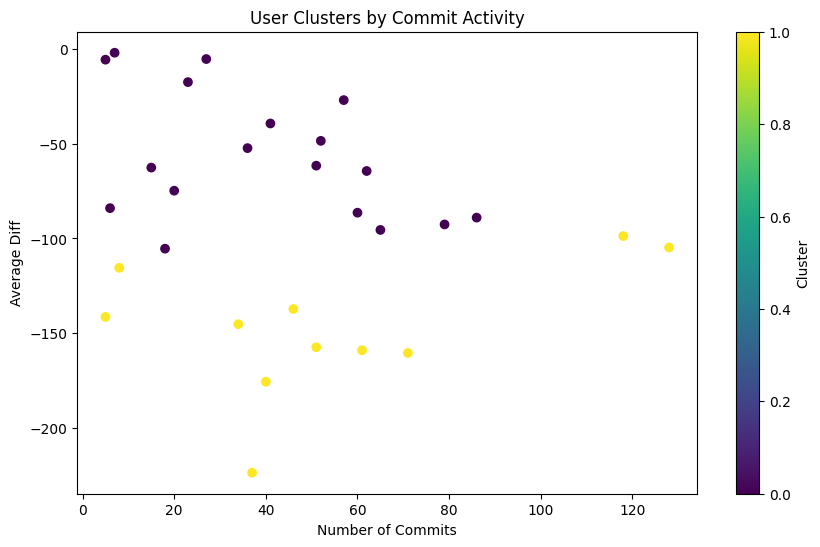

In [7]:
_, score = clusterize_kmeans(X)
visulize_clusters(pred, X)
scores['3'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'3': score}

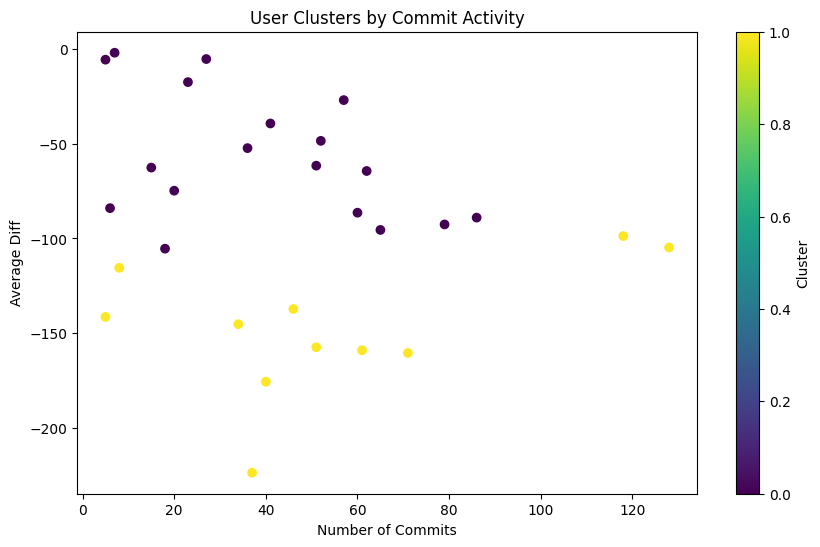

In [8]:
_, score = clusterize_kmeans(X, n_clusters=4)
visulize_clusters(pred, X)
scores['4'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'4': score}

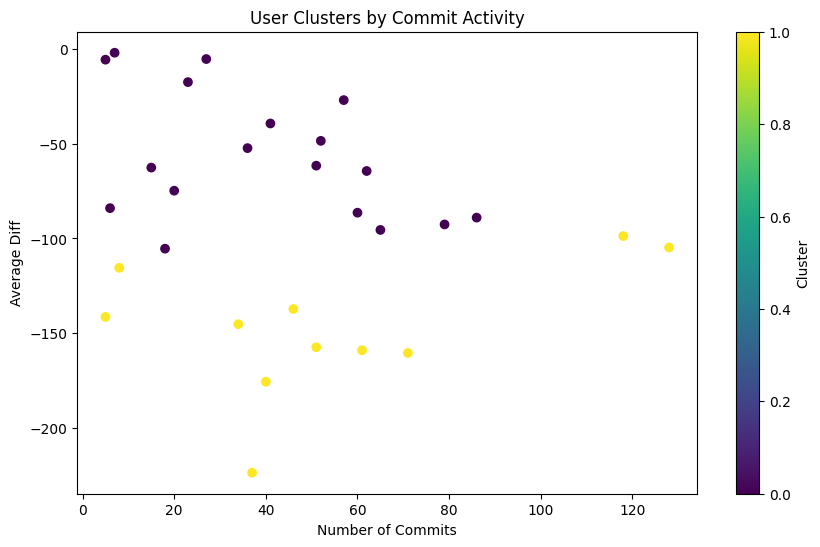

In [9]:
_, score = clusterize_kmeans(X, n_clusters=5)
visulize_clusters(pred, X)
scores['5'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'5': score}

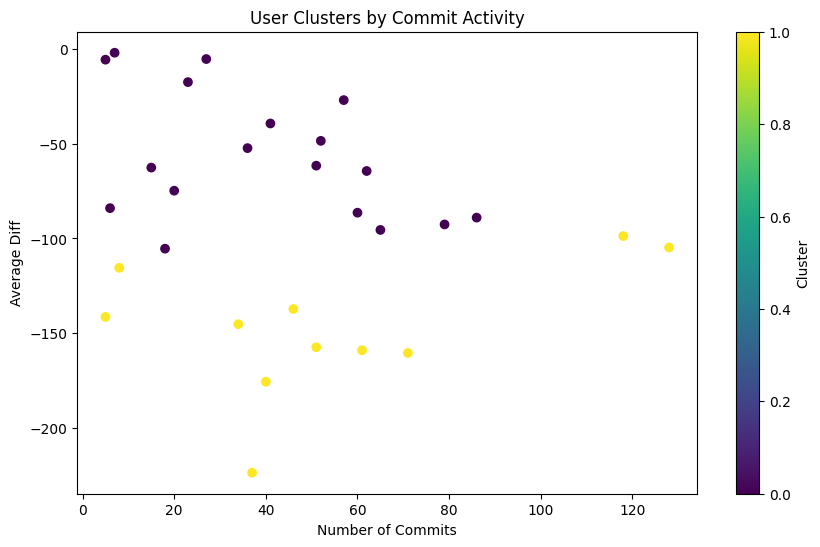

In [10]:
_, score = clusterize_kmeans(X, n_clusters=6)
visulize_clusters(pred, X)
scores['6'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'6': score}

In [11]:
for key, value in scores.items():
    print(f"{key} clusters -- {value}")

for key in best_score.keys():
    best_scores.append(f'Best KMeans: n_clusters={key} -- {best_score[key]}')

2 clusters -- 0.4194920562377423
3 clusters -- 0.4454402135233297
4 clusters -- 0.41503879936268956
5 clusters -- 0.3521030626149593
6 clusters -- 0.3954350435152892


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [12]:
def clusterize_dbscan(X, eps=20, min_samples=2):
    dbscan_instance = DBSCAN(eps=eps, min_samples=min_samples)
    pred = dbscan_instance.fit_predict(X)
    score = silhouette_score(X, pred)
    return pred, score

scores_2 = {}

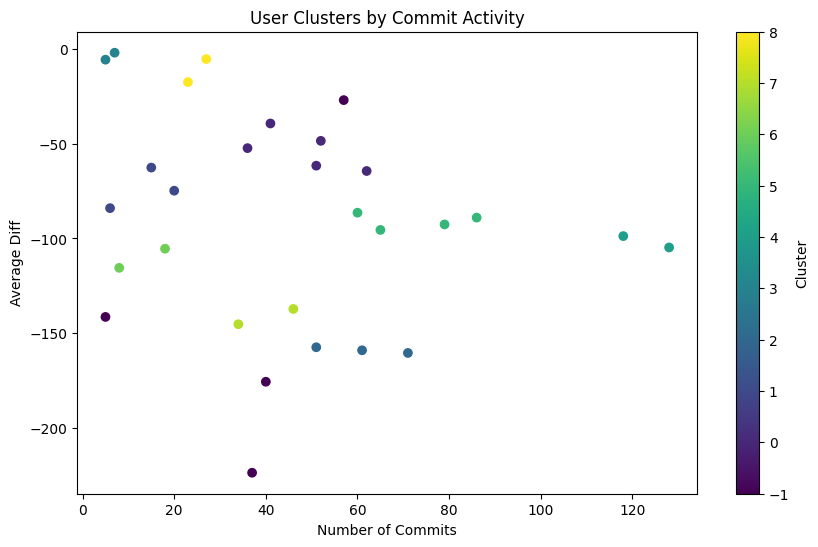

In [13]:
pred, score = clusterize_dbscan(X)
visulize_clusters(pred, X)
scores_2['eps=20, min_samples=2'] = score
best_score = {'eps=20, min_samples=2': score}

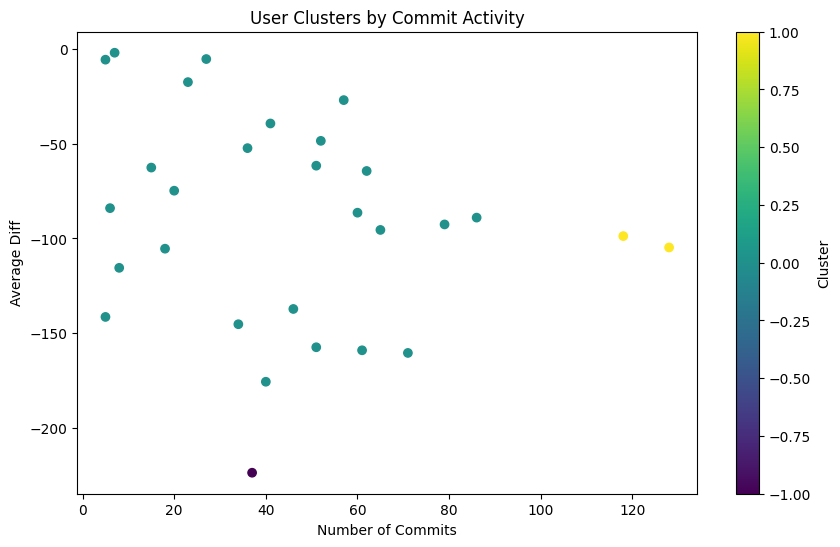

In [14]:
pred, score = clusterize_dbscan(X, eps = 30, min_samples=2)
visulize_clusters(pred, X)
scores_2['eps=30, min_samples=2'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'eps=30, min_samples=2': score}

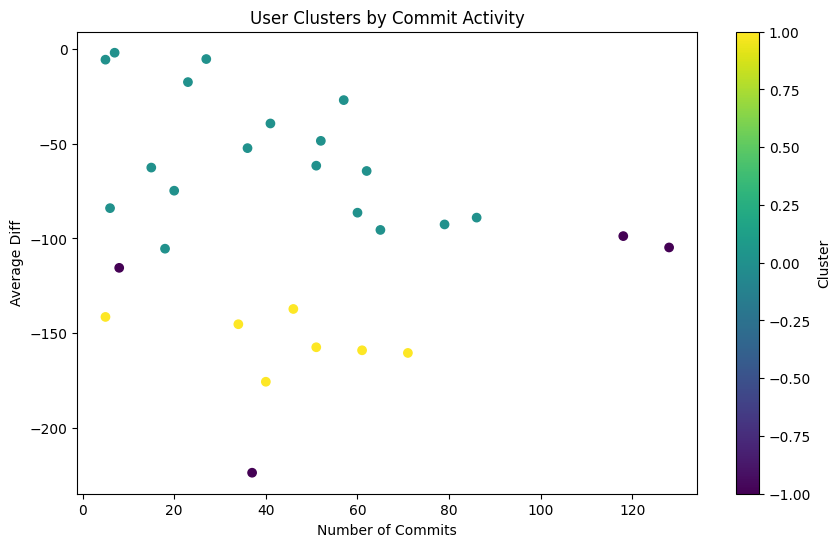

In [15]:
pred, score = clusterize_dbscan(X, eps = 30, min_samples=4)
visulize_clusters(pred, X)
scores_2['eps=30, min_samples=4'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'eps=30, min_samples=4': score}

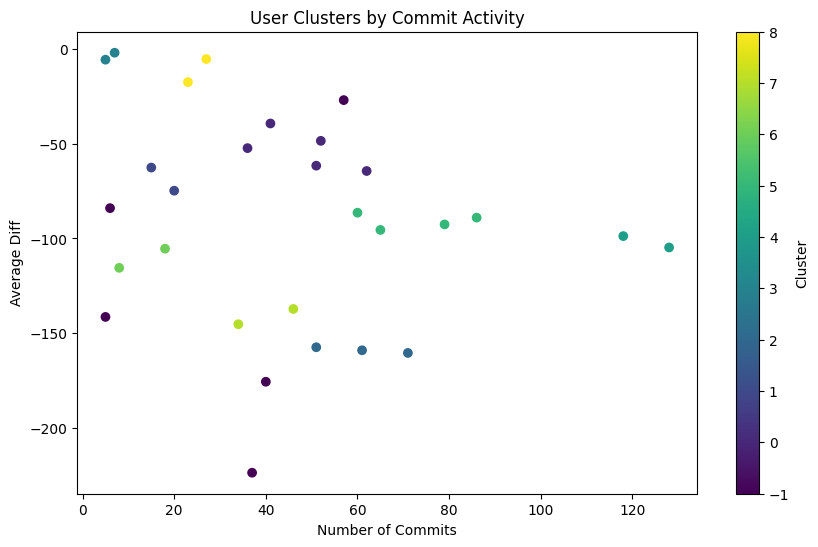

In [16]:
pred, score = clusterize_dbscan(X, eps=15, min_samples=2)
visulize_clusters(pred, X)
scores_2['eps=15, min_samples=2'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'eps=15, min_samples=2': score}

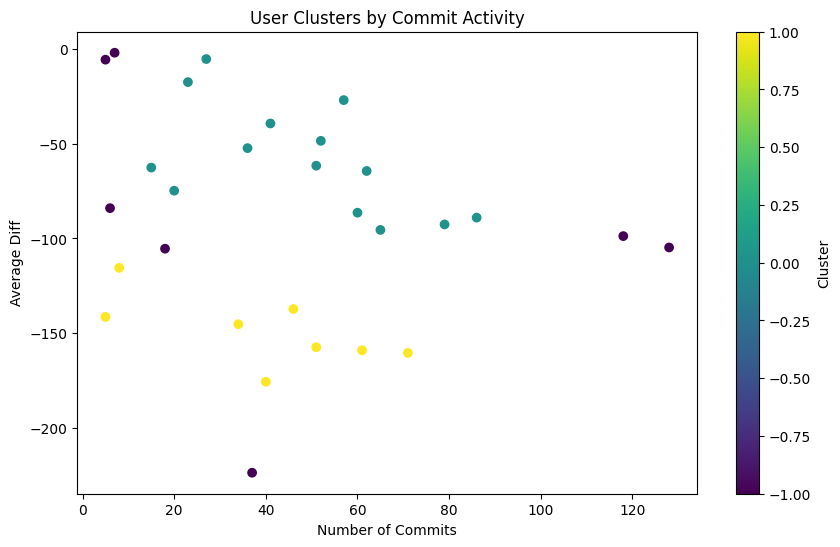

In [17]:
pred, score = clusterize_dbscan(X, eps=40, min_samples=8)
visulize_clusters(pred, X)
scores_2['eps=40, min_samples=8'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'eps=40, min_samples=8': score}

In [18]:
for key, value in scores_2.items():
    print(f"{key} -- {value}")

for key in best_score.keys():
    best_scores.append(f'Best DBSCAN:{key} -- {best_score[key]}')

eps=20, min_samples=2 -- 0.38339641455696616
eps=30, min_samples=2 -- 0.19881722125199422
eps=30, min_samples=4 -- 0.37939165508577244
eps=15, min_samples=2 -- 0.3469844857581226
eps=40, min_samples=8 -- 0.2905364276791425


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [19]:
def clusterize_agg(X, n_clusters=5, linkage='ward', metric='euclidean'):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
    pred = agg.fit_predict(X)
    score = silhouette_score(X, pred)
    return pred, score

scores_3 = {}

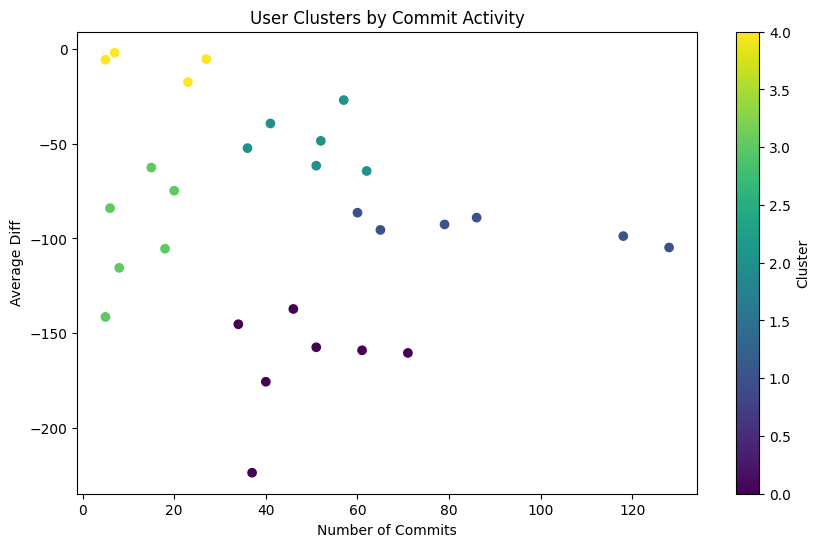

In [20]:
pred, score = clusterize_agg(X)
visulize_clusters(pred, X)
scores_3['n_clusters = 5: '] = score
best_score = {'n_clusters = 5': score}

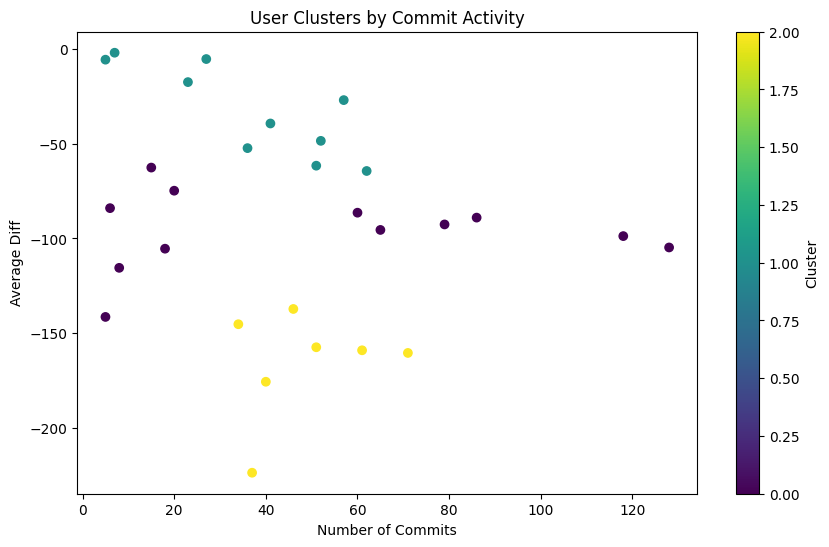

In [21]:
pred, score = clusterize_agg(X, n_clusters=3)
visulize_clusters(pred, X)
scores_3['n_clusters = 3:'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'n_clusters = 3': score}

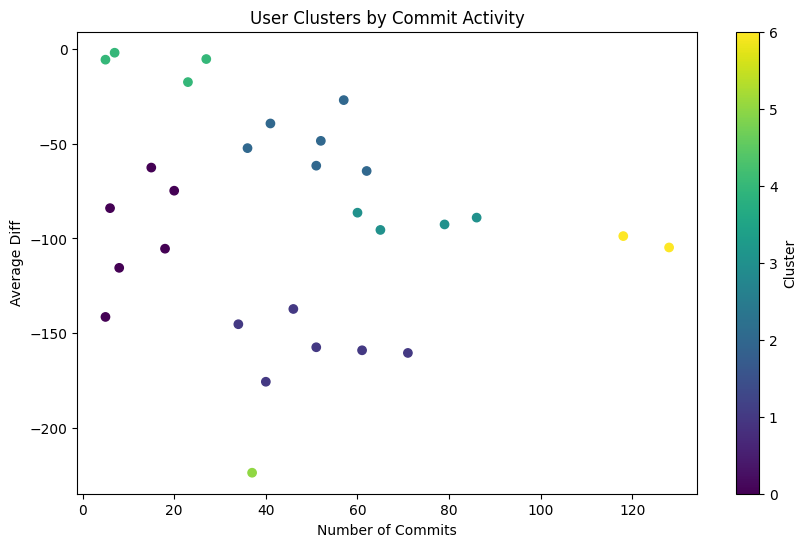

In [22]:
pred, score = clusterize_agg(X, n_clusters=7)
visulize_clusters(pred, X)
scores_3['n_clusters = 7:'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'n_clusters = 7:': score}

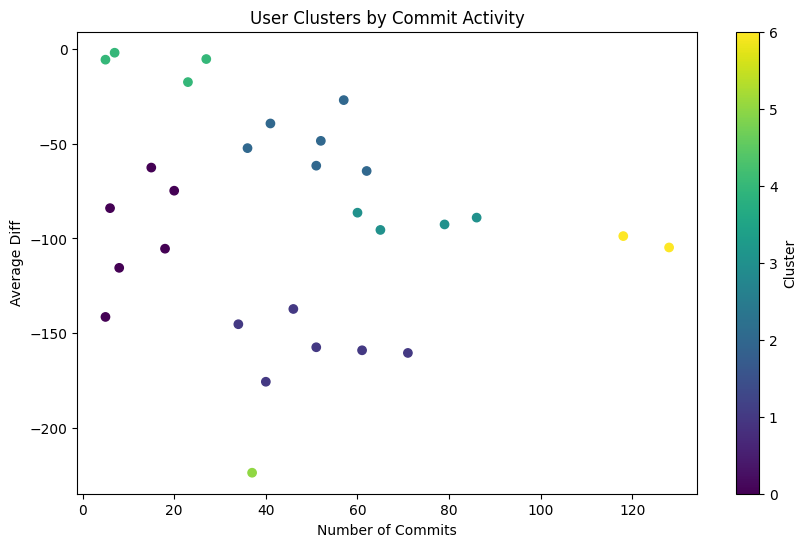

In [23]:
pred, score = clusterize_agg(X, n_clusters=7)
visulize_clusters(pred, X)
scores_3['n_clusters = 9:'] = score
for key in best_score.keys():
    if best_score[key] < score:
        best_score = {'n_clusters = 9:': score}

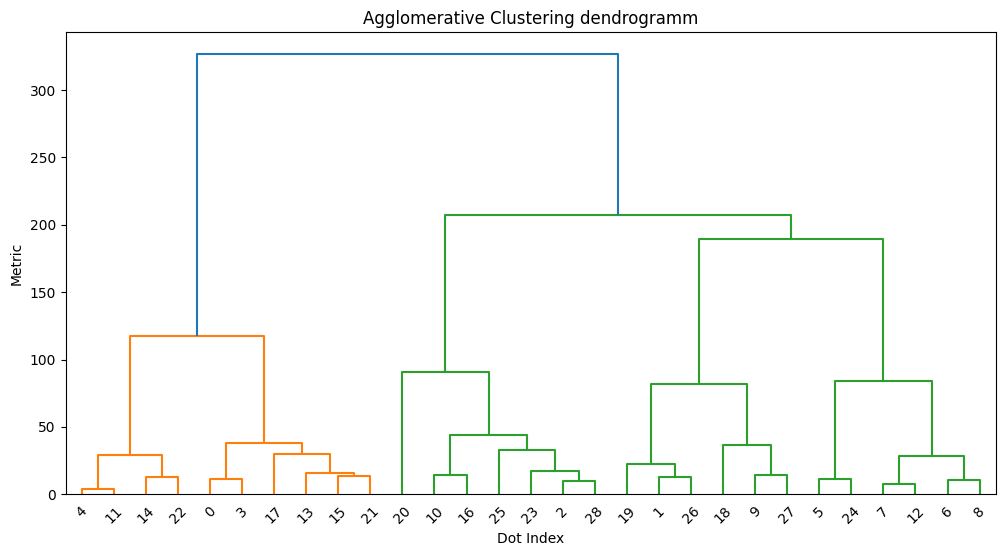

In [24]:
plt.figure(figsize=(12, 6))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title('Agglomerative Clustering dendrogramm')
plt.xlabel('Dot Index')
plt.ylabel('Metric')
plt.show()

In [25]:
for key, value in scores_3.items():
    print(f"{key} -- {value}")

for key in best_score.keys():
    best_scores.append(f'Best Agg:{key} -- {best_score[key]}')

n_clusters = 5:  -- 0.46383015199381467
n_clusters = 3: -- 0.3390493703444805
n_clusters = 7: -- 0.4865808853184314
n_clusters = 9: -- 0.4865808853184314


### Lets see the results

In [26]:
for item in best_scores:
    print(item)

Best KMeans: n_clusters=3 -- 0.4454402135233297
Best DBSCAN:eps=20, min_samples=2 -- 0.38339641455696616
Best Agg:n_clusters = 7: -- 0.4865808853184314


### Why so?

The points are not uniformly distributed, so setting a specific minimum distance and calculating by average gives a worse result.

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def optimize_and_visualize(model_class, fixed_params, param_name, param_range, X):
    
    scores = []
    best_score = -1
    best_value = None
    best_labels = None
    
    # Перебираем значения параметра
    for value in param_range:
        # Создаем параметры для модели
        params = fixed_params.copy()
        params[param_name] = value
        
        try:
            # Создаем и обучаем модель
            model = model_class(**params)
            labels = model.fit_predict(X)
            
            # Пропускаем случаи, когда все точки в одном кластере или все шум
            unique_labels = np.unique(labels)
            if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
                scores.append(-1)  # Некорректная кластеризация
                continue
                
            # Вычисляем silhouette score
            score = silhouette_score(X, labels)
            scores.append(score)
            
            # Обновляем лучший результат
            if score > best_score:
                best_score = score
                best_value = value
                best_labels = labels
                best_model = model
                
        except Exception as e:
            print(f"Ошибка для {param_name}={value}: {e}")
            scores.append(-1)
    
    # Создаем графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Первый график: зависимость silhouette score от параметра
    ax1.plot(param_range[:len(scores)], scores, 'bo-', linewidth=2, markersize=6)
    ax1.axvline(x=best_value, color='red', linestyle='--', 
                label=f'Best {param_name} = {best_value}\nScore = {best_score:.3f}')
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title(f'Optimization of {param_name}\n{model_class.__name__}')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Второй график: визуализация кластеров с лучшим параметром
    scatter = ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, 
                         cmap='viridis', alpha=0.7)
    ax2.set_xlabel(X.columns[0])
    ax2.set_ylabel(X.columns[1])
    ax2.set_title(f'Best Clustering ({param_name}={best_value})\nSilhouette Score: {best_score:.3f}')
    
    # Добавляем цветовую шкалу
    plt.colorbar(scatter, ax=ax2, label='Cluster')
    
    # Если это KMeans, показываем центроиды
    if hasattr(best_model, 'cluster_centers_'):
        centers = best_model.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', 
                   s=20, linewidth=3, label='Centroids')
        ax2.legend()
    
    plt.tight_layout()
    
    return fig, best_value, best_score

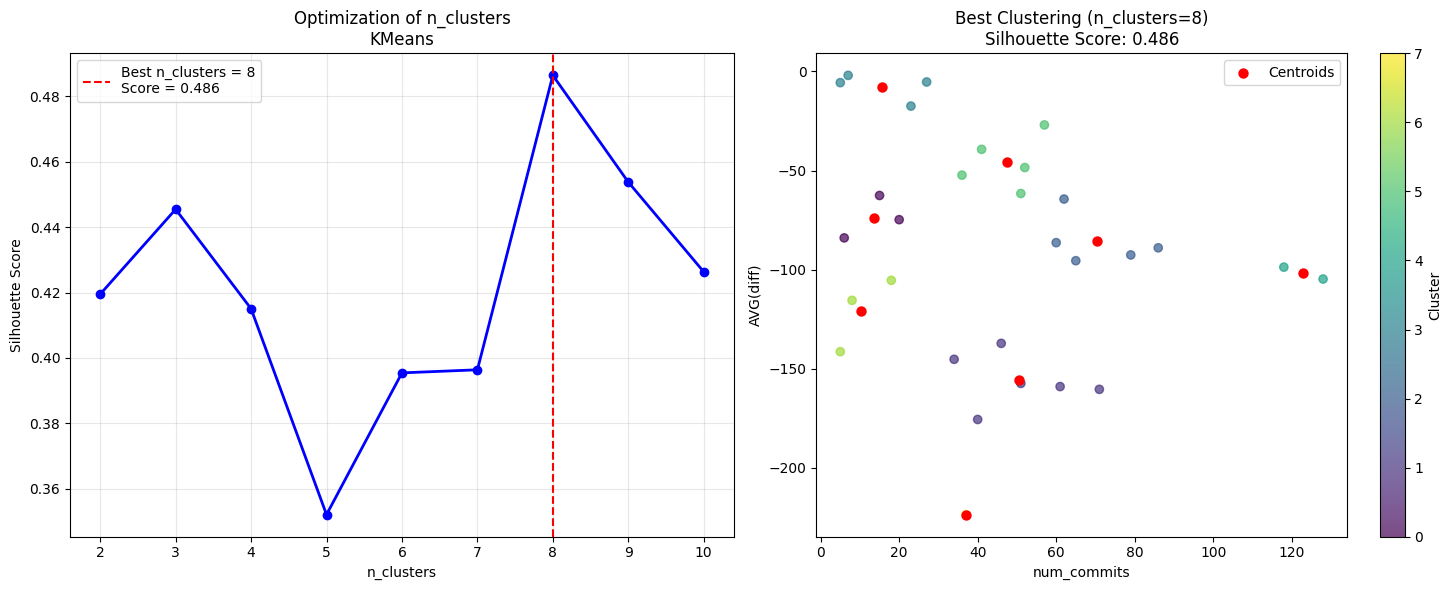

Лучшее число кластеров: 8
Лучший silhouette score: 0.486


In [28]:
fig, best_k, best_score = optimize_and_visualize(
    model_class=KMeans,
    fixed_params={'random_state': 21},
    param_name='n_clusters',
    param_range=range(2, 11),  # Пробуем от 2 до 10 кластеров
    X=X
)
plt.show()

print(f"Лучшее число кластеров: {best_k}")
print(f"Лучший silhouette score: {best_score:.3f}")